In [1]:
# libs
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import plotly.graph_objects as go

from wordcloud import WordCloud
from nltk.corpus import stopwords

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Creating dataset of sentiment analysis
df = pd.read_csv('stock_tweets.csv')
df.head()

Date  \
0  2022-09-29 23:41:16+00:00   
1  2022-09-29 23:24:43+00:00   
2  2022-09-29 23:18:08+00:00   
3  2022-09-29 22:40:07+00:00   
4  2022-09-29 22:27:05+00:00   

                                               Tweet Stock Name Company Name  
0  Mainstream media has done an amazing job at br...       TSLA  Tesla, Inc.  
1  Tesla delivery estimates are at around 364k fr...       TSLA  Tesla, Inc.  
2  3/ Even if I include 63.0M unvested RSUs as of...       TSLA  Tesla, Inc.  
3  @RealDanODowd @WholeMarsBlog @Tesla Hahaha why...       TSLA  Tesla, Inc.  
4  @RealDanODowd @Tesla Stop trying to kill kids,...       TSLA  Tesla, Inc.

### Knowing de Dataset

In [3]:
df.shape

(80793, 4)

In [4]:
df.isnull().sum()

Date            0
Tweet           0
Stock Name      0
Company Name    0
dtype: int64

In [5]:
df['Stock Name'].unique()

array(['TSLA', 'MSFT', 'PG', 'META', 'AMZN', 'GOOG', 'AMD', 'AAPL',
       'NFLX', 'TSM', 'KO', 'F', 'COST', 'DIS', 'VZ', 'CRM', 'INTC', 'BA',
       'BX', 'NOC', 'PYPL', 'ENPH', 'NIO', 'ZS', 'XPEV'], dtype=object)

In [6]:
# filtering a specific ticker
stock =  'AMZN'

In [7]:
df_stock = df[df['Stock Name'] == stock]
df_stock.head()

Date  \
48351  2022-09-29 22:40:47+00:00   
48352  2022-09-29 22:23:54+00:00   
48353  2022-09-29 18:34:51+00:00   
48354  2022-09-29 15:57:59+00:00   
48355  2022-09-29 15:10:30+00:00   

                                                   Tweet Stock Name  \
48351  A group of lawmakers led by Sen. Elizabeth War...       AMZN   
48352  $NIO just because I'm down money doesn't mean ...       AMZN   
48353  Today’s drop in $SPX is a perfect example of w...       AMZN   
48354  Druckenmiller owned $CVNA this year \nMunger b...       AMZN   
48355  Top 10 $QQQ Holdings \n\nAnd Credit Rating\n\n...       AMZN   

           Company Name  
48351  Amazon.com, Inc.  
48352  Amazon.com, Inc.  
48353  Amazon.com, Inc.  
48354  Amazon.com, Inc.  
48355  Amazon.com, Inc.

In [8]:
df_stock.shape

(4089, 4)

In [9]:
# creating a text for WordCloud
text = ' '.join(df_stock['Tweet'])
text

'A group of lawmakers led by Sen. Elizabeth Warren (D-Mass.) is asking the Federal Trade Commission to reject Amazon\'s, $AMZN, proposed acquisition of iRobot, per a letter shared first with Axios. $NIO just because I\'m down money doesn\'t mean this is a bad investment. The whole market, everything sucks right now. 2-5 years from now, I\'m confident it will pay off. Long the best $AAPL $AMZN $TSLA $GOOGL $NIO Today’s drop in $SPX is a perfect example of what happens when $AAPL and $AMZN turn lower.\n\nThere are a few names that have held up markets for years.\n\nThose names are finally dropping and we are beginning to see the damage.\n\nNo healthy market is driven by just a few names. Druckenmiller owned $CVNA this year \nMunger bought $BABA on margin \nAswath “Dean of Valuation” Damodoran loved $AMZN and $META all year \n\nNo one is safe from investing losses but be wary of anyone always on the right side of every trade. \n\nAnd there’s a long list on this bird app Top 10 $QQQ Holdin

In [10]:
# WordCloud of the stock
stop_words = set(stopwords.words("english"))
stop_words.update(['https','co'])
wordcloud = WordCloud(width = 2000, height = 1000, random_state=42, background_color='black',
                      collocations=False, stopwords = stop_words).generate(text)
stop_words.update(['https'])
plt.figure(figsize=(20, 30))

# Display image
plt.imshow(wordcloud) 
plt.axis("off")
plt.show()

In [11]:
# preparing dataset for Vader model
df_sent = df_stock.copy()
df_sent["sentiment_score"] = ''
df_sent["Negative"] = ''
df_sent["Neutral"] = ''
df_sent["Positive"] = ''
df_sent.head()

Date  \
48351  2022-09-29 22:40:47+00:00   
48352  2022-09-29 22:23:54+00:00   
48353  2022-09-29 18:34:51+00:00   
48354  2022-09-29 15:57:59+00:00   
48355  2022-09-29 15:10:30+00:00   

                                                   Tweet Stock Name  \
48351  A group of lawmakers led by Sen. Elizabeth War...       AMZN   
48352  $NIO just because I'm down money doesn't mean ...       AMZN   
48353  Today’s drop in $SPX is a perfect example of w...       AMZN   
48354  Druckenmiller owned $CVNA this year \nMunger b...       AMZN   
48355  Top 10 $QQQ Holdings \n\nAnd Credit Rating\n\n...       AMZN   

           Company Name sentiment_score Negative Neutral Positive  
48351  Amazon.com, Inc.                                            
48352  Amazon.com, Inc.                                            
48353  Amazon.com, Inc.                                            
48354  Amazon.com, Inc.                                            
48355  Amazon.com, Inc.

In [12]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata

In [13]:
# Vader scores
sentiment_analyzer = SentimentIntensityAnalyzer()
df_sent['sentiment_score'] = df_sent['Tweet'].apply(lambda x: sentiment_analyzer.polarity_scores(x)['compound'])
df_sent['Negative'] = df_sent['Tweet'].apply(lambda x: sentiment_analyzer.polarity_scores(x)['neg'])
df_sent['Neutral'] = df_sent['Tweet'].apply(lambda x: sentiment_analyzer.polarity_scores(x)['neu'])
df_sent['Positive'] = df_sent['Tweet'].apply(lambda x: sentiment_analyzer.polarity_scores(x)['pos'])
  

In [14]:
df_sent

Date  \
48351  2022-09-29 22:40:47+00:00   
48352  2022-09-29 22:23:54+00:00   
48353  2022-09-29 18:34:51+00:00   
48354  2022-09-29 15:57:59+00:00   
48355  2022-09-29 15:10:30+00:00   
...                          ...   
52435  2021-09-30 20:50:16+00:00   
52436  2021-09-30 19:45:13+00:00   
52437  2021-09-30 18:01:19+00:00   
52438  2021-09-30 17:56:14+00:00   
52439  2021-09-30 01:59:22+00:00   

                                                   Tweet Stock Name  \
48351  A group of lawmakers led by Sen. Elizabeth War...       AMZN   
48352  $NIO just because I'm down money doesn't mean ...       AMZN   
48353  Today’s drop in $SPX is a perfect example of w...       AMZN   
48354  Druckenmiller owned $CVNA this year \nMunger b...       AMZN   
48355  Top 10 $QQQ Holdings \n\nAnd Credit Rating\n\n...       AMZN   
...                                                  ...        ...   
52435  My top 10 holdings make up 66% of my portfolio...       AMZN   
52436  Amazon $AMZN has 4X the market cap of Alibaba ...       AMZN   
52437  Returns over the last 10 Years:\n\nBitcoin $BT...       AMZN   
52438  Great snapshot of what it looks like when an i...       AMZN   
52439  Shopify is now 9% of US e-commerce. It really ...       AMZN   

           Company Name  sentiment_score  Negative  Neutral  Positive  
48351  Amazon.com, Inc.          -0.0772     0.084    0.841     0.075  
48352  Amazon.com, Inc.           0.2500     0.158    0.684     0.158  
48353  Amazon.com, Inc.          -0.3182     0.164    0.728     0.108  
48354  Amazon.com, Inc.           0.2382     0.065    0.851     0.083  
48355  Amazon.com, Inc.           0.7783     0.000    0.799     0.201  
...                 ...              ...       ...      ...       ...  
52435  Amazon.com, Inc.           0.4515     0.000    0.928     0.072  
52436  Amazon.com, Inc.          -0.5106     0.095    0.873     0.032  
52437  Amazon.com, Inc.          -0.2263     0.089    0.821     0.091  
52438  Amazon.com, Inc.           0.9369     0.000    0.740     0.260  
52439  Amazon.com, Inc.           0.5809     0.000    0.759     0.241  

[4089 rows x 8 columns]

In [15]:
# Sentiment score analysis
df_sent['Date'] = pd.to_datetime(df_sent['Date']).dt.date

In [16]:
sent_score = df_sent[['Date','sentiment_score']].groupby('Date').mean()
sent_score.head()

sentiment_score
Date                       
2021-09-30         0.246480
2021-10-01         0.359337
2021-10-02        -0.000700
2021-10-03         0.834400
2021-10-04         0.258650

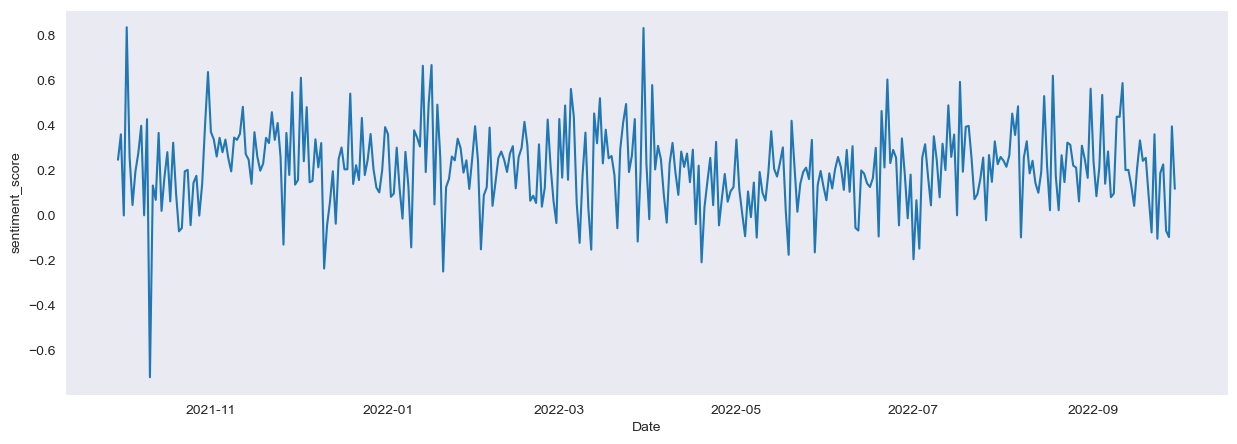

In [17]:
# plotting sentiment score
fig, ax = plt.subplots(1,1,figsize=(15,5))
sns.lineplot(data = sent_score, x = 'Date', y = 'sentiment_score')
plt.grid()
plt.show()


In [18]:
trend = sent_score["sentiment_score"].rolling(window=24, center=True).mean()
seasonal = sent_score["sentiment_score"] - trend

Text(0.5, 1.0, 'Seasonality')

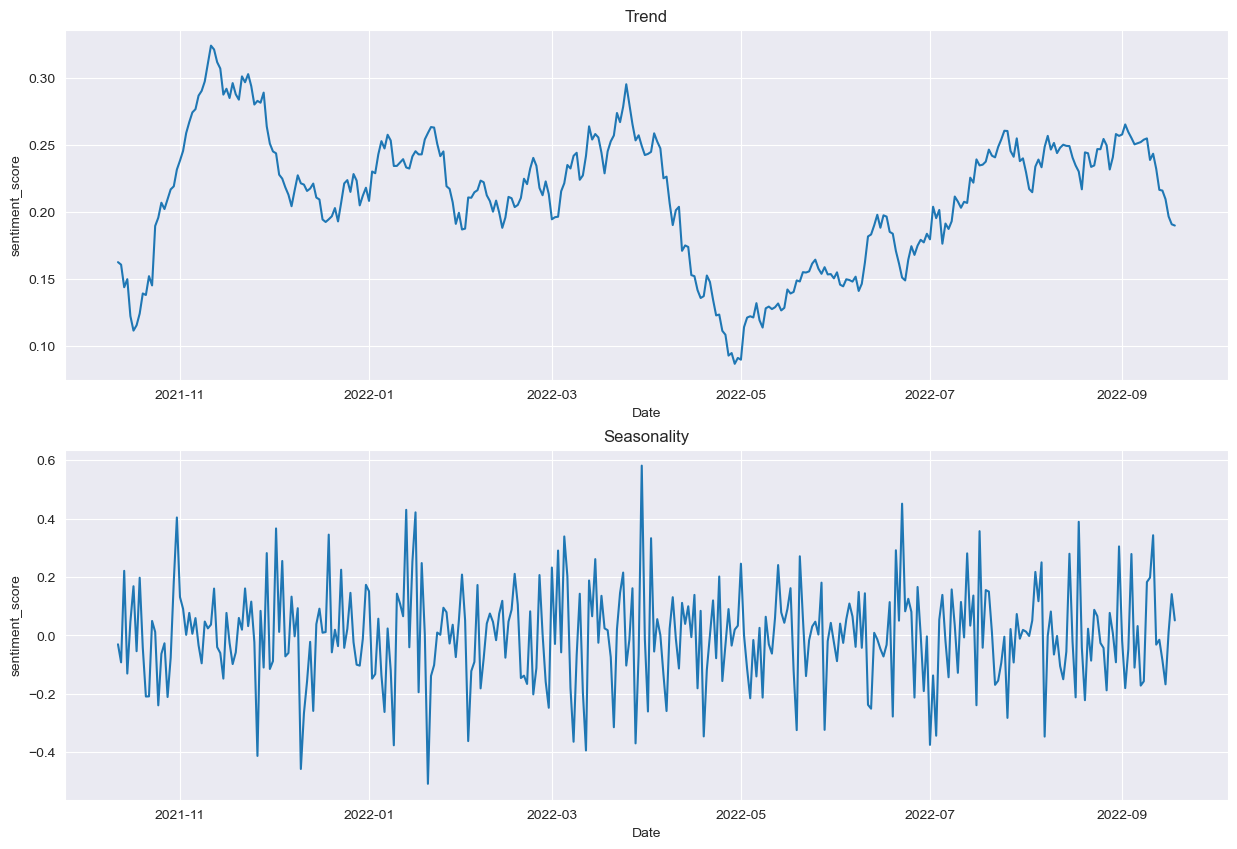

In [19]:
# looking for trend and season
fig, ax = plt.subplots(2,1,figsize=(15,10))
sns.lineplot(data = sent_score, x = 'Date', y = trend, ax=ax[0]).set_title('Trend')
sns.lineplot(data = sent_score, x = 'Date', y = seasonal, ax=ax[1]).set_title('Seasonality')

In [20]:
# Dataset of prices and volume
df2 = pd.read_csv('stock_yfinance_data.csv')
df2.head()

Date        Open        High         Low       Close   Adj Close  \
0  2021-09-30  260.333344  263.043335  258.333344  258.493347  258.493347   
1  2021-10-01  259.466675  260.260010  254.529999  258.406677  258.406677   
2  2021-10-04  265.500000  268.989990  258.706665  260.510010  260.510010   
3  2021-10-05  261.600006  265.769989  258.066681  260.196655  260.196655   
4  2021-10-06  258.733337  262.220001  257.739990  260.916656  260.916656   

     Volume Stock Name  
0  53868000       TSLA  
1  51094200       TSLA  
2  91449900       TSLA  
3  55297800       TSLA  
4  43898400       TSLA

In [21]:
df_finance = df2[df2['Stock Name'] == stock]
df_finance['Date'] = pd.to_datetime(df_finance['Date']).dt.date
df_finance = df_finance.drop('Stock Name', axis=1)

In [22]:
df_final = df_finance.join(sent_score, how = 'left', on='Date')
df_final.head()

Date        Open        High         Low       Close   Adj Close  \
1008  2021-09-30  165.800003  166.392502  163.699493  164.251999  164.251999   
1009  2021-10-01  164.450500  165.458496  162.796997  164.162994  164.162994   
1010  2021-10-04  163.969498  163.999496  158.812500  159.488998  159.488998   
1011  2021-10-05  160.225006  163.036499  160.123001  161.050003  161.050003   
1012  2021-10-06  160.676498  163.216995  159.931000  163.100494  163.100494   

        Volume  sentiment_score  
1008  56848000         0.246480  
1009  56712000         0.359337  
1010  90462000         0.258650  
1011  65384000         0.045500  
1012  50660000         0.194300

<Axes: >

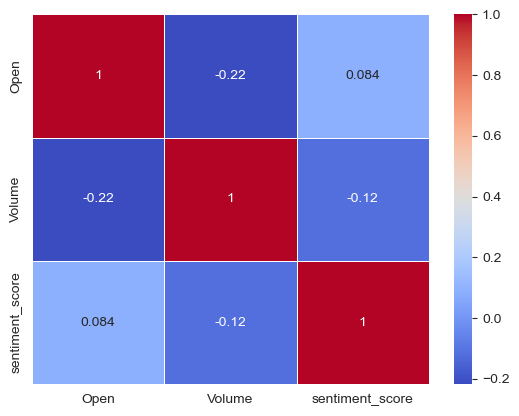

In [23]:
sns.heatmap(df_final[['Open','Volume', 'sentiment_score']].corr(),annot = True, linewidth = 0.5, cmap ='coolwarm')

In [24]:
fig = go.Figure(data=[go.Candlestick(x=df_final['Date'],
                open=df_final['Open'],
                high=df_final['High'],
                low=df_final['Low'],
                close=df_final['Close'])])
fig.show()

In [25]:
trend_close = df_final["Close"].rolling(window=24, center=True).mean()
seasonal_close = df_final["Close"] - trend_close

Text(0.5, 1.0, 'Seasonality')

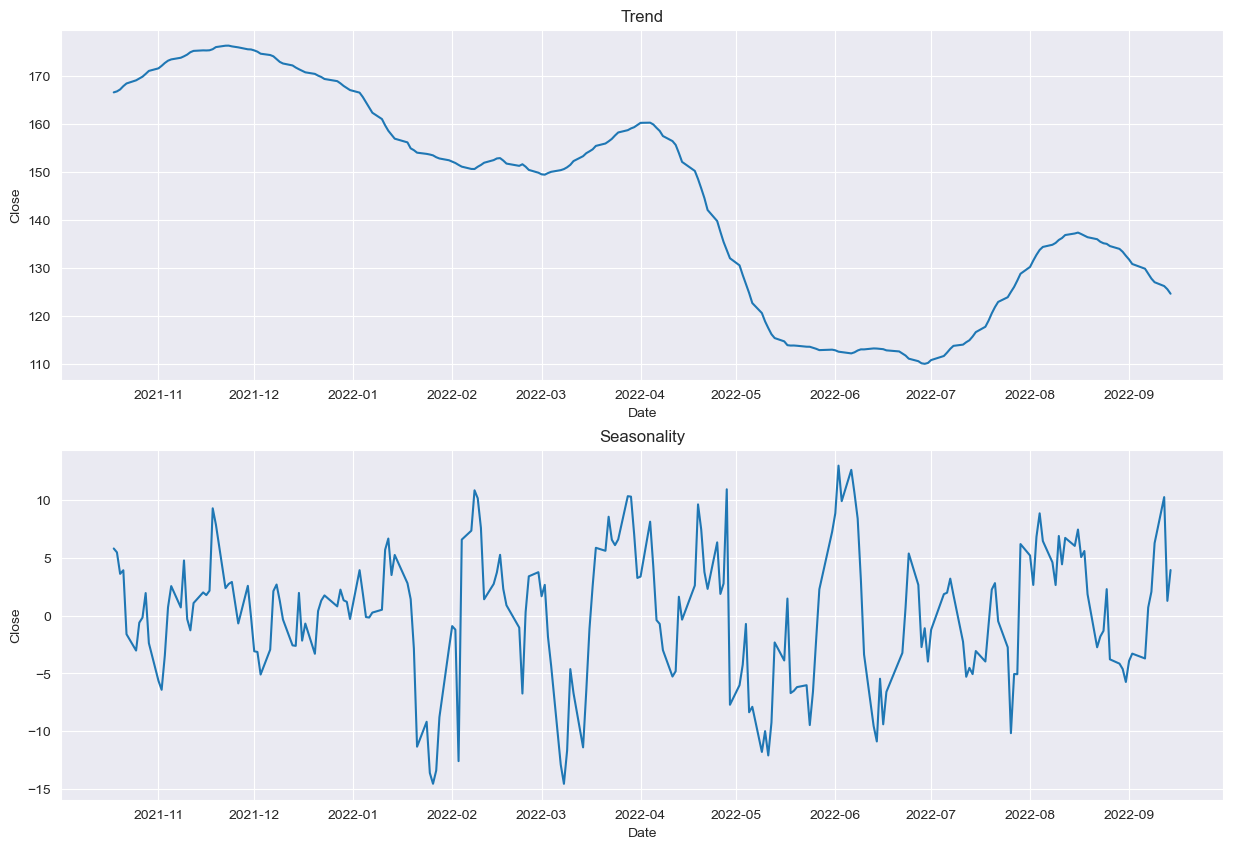

In [26]:
fig, ax = plt.subplots(2,1,figsize=(15,10))
sns.lineplot(data = df_final, x = 'Date', y = trend_close, ax=ax[0]).set_title('Trend')
sns.lineplot(data = df_final, x = 'Date', y = seasonal_close, ax=ax[1]).set_title('Seasonality')

In [27]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [28]:
features = ["High", "Low", "Open", "Close", "Volume", "sentiment_score"]
target = "Close"

In [29]:
scaler = StandardScaler()
df_final[features] = scaler.fit_transform(df_final[features])

In [30]:
def create_sequences(data, target, window_size):
    x, y = [], []
    for i in range(len(data) - window_size):
        x.append(data[i:i+window_size])
        y.append(target[i+window_size])
    return np.array(x), np.array(y)

window_size = 30  # Use the last 30 days to predict the next day
x, y = create_sequences(df_final[features].values, df_final[target].values, window_size)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)

In [31]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(1)  # Predict a single value (next day's closing price)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 30, 64)              │          18,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,625 (119.63 KB)

 Trainable params: 30,625 (119.63 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 129ms/step - loss: 0.8254 - val_loss: 0.1893
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2814 - val_loss: 0.0915
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2160 - val_loss: 0.1928
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1981 - val_loss: 0.0819
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1143 - val_loss: 0.0359
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1158 - val_loss: 0.0302
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1033 - val_loss: 0.0304
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1069 - val_loss: 0.0345
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0928 - val_loss: 0.0500
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1032 - val_loss: 0.0653
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0872 - val_loss: 0.0485
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0795 - val_loss: 0.0361


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 306ms/step


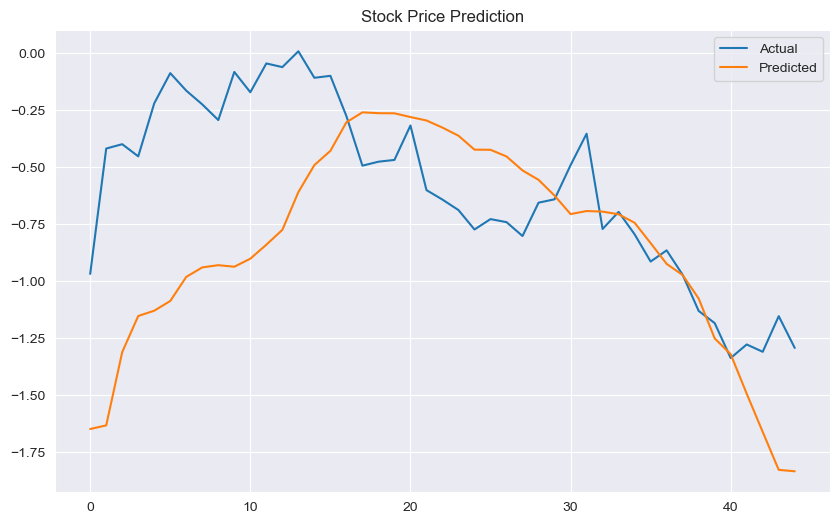

In [33]:
y_pred = model.predict(x_test)

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.plot(y_test, label="Actual")
plt.plot(y_pred, label="Predicted")
plt.legend()
plt.title("Stock Price Prediction")
plt.show()